<a href="https://colab.research.google.com/github/ricsilrib/teoria-dos-grafos-trabalho-pratico-1/blob/main/terceira_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

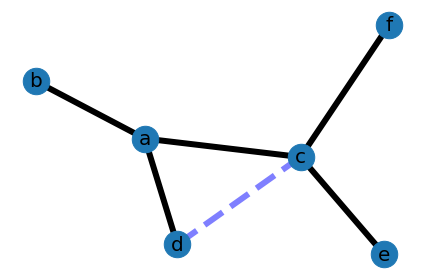

In [171]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=5)
G.add_edge("a", "c", weight=3)
G.add_edge("c", "d", weight=2)
G.add_edge("c", "e", weight=6)
G.add_edge("c", "f", weight=4)
G.add_edge("a", "d", weight=7)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 2.0]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 2.0]

pos = nx.spring_layout(G, seed=7)


nx.draw_networkx_nodes(G, pos, node_size=700)


nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)


nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

# Busca em Profundidade

In [182]:
def dfs(G, v):
    V = set(G.nodes)
    if v in V:
        visitados = set()
        caminho = []
        pilha = []       
        visitados.add(v)     
        pilha.append(v)
        while pilha:
            vt = pilha[-1]
            adjacentes_vt = set(G.neighbors(vt))
            for w in adjacentes_vt:
                if adjacentes_vt <= visitados:
                    pilha.pop()
                    break
                elif w not in visitados:
                    visitados.add(w)
                    pilha.append(w)
                    aresta = (vt, w)
                    caminho.append(aresta)
                    break
        return caminho

# Busca em Largura

In [183]:
def bfs(G, v):
    V = set(G.nodes)
    if v in V:
        visitados = set()
        caminho = []
        fila = []
        visitados.add(v)
        fila.append(v)

        while fila:
            u = fila[0]
            fila.remove(u)
            adjacentes_u = set(G.neighbors(u))
            for w in adjacentes_u:
                if w not in visitados:
                    visitados.add(w)
                    fila.append(w)
                    aresta = (u, w)
                    caminho.append(aresta)

        return caminho

# Algoritmo de Dijkstra

In [190]:
from heapq import heappush, heappop
from itertools import count
import networkx as nx


def dijkstra(G, origem, get_weight, paths=None, destino=None):

    G_succ = G.succ if G.is_directed() else G.adj

    push = heappush
    pop = heappop
    dist = {} 
    seen = {origem: 0}
    c = count()
    fringe = [] 
    push(fringe, (0, next(c), origem))
    while fringe:
        (d, _, v) = pop(fringe)
        if v in dist:
            continue 
        dist[v] = d
        if v == destino:
            break

        for u, e in G_succ[v].items():
            cost = get_weight(v, u, e)
            if cost is None:
                continue
            vu_dist = dist[v] + get_weight(v, u, e)

            if u in dist:
                if vu_dist < dist[u]:
                    raise ValueError('Caminhos contraditórios. Verifique se há pesos negativos!')
            elif u not in seen or vu_dist < seen[u]:
                seen[u] = vu_dist
                push(fringe, (vu_dist, next(c), u))
                if paths is not None:
                    paths[u] = paths[v] + [u]
                
    if paths is not None:
        return (dist, paths)

    return dist

def menores_caminhos_da_origem(G, origem):

    weight='weight'
    if G.is_multigraph():
        get_weight = lambda u, v, data: min(
            eattr.get(weight, 1) for eattr in data.values())
    else:
        get_weight = lambda u, v, data: data.get(weight, 1)

    return dijkstra(G, origem, get_weight)

def paths_da_origem(G, origem):
  return {n: menores_caminhos_da_origem(G, n) for n in G}

In [185]:
def menor_caminho(G, origem, destino=None):
    weight = 'weight'
    if origem == destino:
        return ({origem: 0}, {origem: [origem]})

    if G.is_multigraph():
        get_weight = lambda u, v, data: min(
            eattr.get(weight, 1) for eattr in data.values())
    else:
        get_weight = lambda u, v, data: data.get(weight, 1)

    paths = {origem: [origem]}  
    return dijkstra(G, origem, get_weight, paths=paths, destino=destino)


In [186]:
def dijkstra_path(G, origem, destino):
    (length, path) = menor_caminho(G, origem, destino=destino)
    try:
        return path[destino]
    except KeyError:
        raise nx.NetworkXNoPath(
            "Vértice %s não é alcançável a partir do vértice %s" % (origem, destino))

In [187]:
def dijkstra_distancia(G, origem, destino):
    
    distancia = menores_caminhos_da_origem(G, origem)
    try:
        return distancia[destino]
    except KeyError:
        raise nx.NetworkXNoPath(
            "Vértice %s não é alcançável a partir do vértice %s" % (origem, destino))

# Testes

In [191]:
print("DFS")

print(dfs(G,'f'))

print()

print("BFS")

print(bfs(G, 'f'))

print()

menores_caminhos = menores_caminhos_da_origem(G,'b')
paths_da_origem = paths_da_origem(G,'b')
path = dijkstra_path(G,'b','f')
distancia = dijkstra_distancia(G, 'b','f')

print("DICIONÁRIO DAS MENORES DISTÂNCIAS ENTRE O VÉRTICE DE 'ORIGEM' E OS DEMAIS VÉRTICES:\n")
print(menores_caminhos)


print("\nMENORES CAMINHOS ENTRE A 'ORIGEM' E OS DEMAIS VÉRTICES:\n")
for i in paths_da_origem:
  print(dijkstra_path(G,'b',i))

print("\nDICIONÁRIO DAS MENORES DISTÂNCIAS ENTRE CADA PAR DE VÉRTICES:\n")
for x in paths_da_origem:
  print(paths_da_origem[x])

print("\nMENOR CAMINHO ENTRE O VÉRTICE DE 'ORIGEM' E 'DESTINO':\n")
print(path)
print("\nDISTÂNCIA ENTRE O VÉRTICE DE 'ORIGEM' E 'DESTINO':\n")
print(distancia)

DFS
[('f', 'c'), ('c', 'a'), ('a', 'b'), ('a', 'd'), ('c', 'e')]

BFS
[('f', 'c'), ('c', 'a'), ('c', 'd'), ('c', 'e'), ('a', 'b')]

DICIONÁRIO DAS MENORES DISTÂNCIAS ENTRE O VÉRTICE DE 'ORIGEM' E OS DEMAIS VÉRTICES:

{'b': 0, 'a': 5, 'c': 8, 'd': 10, 'f': 12, 'e': 14}

MENORES CAMINHOS ENTRE A 'ORIGEM' E OS DEMAIS VÉRTICES:

['b', 'a']
['b']
['b', 'a', 'c']
['b', 'a', 'c', 'd']
['b', 'a', 'c', 'e']
['b', 'a', 'c', 'f']

DICIONÁRIO DAS MENORES DISTÂNCIAS ENTRE CADA PAR DE VÉRTICES:

{'a': 0, 'c': 3, 'b': 5, 'd': 5, 'f': 7, 'e': 9}
{'b': 0, 'a': 5, 'c': 8, 'd': 10, 'f': 12, 'e': 14}
{'c': 0, 'd': 2, 'a': 3, 'f': 4, 'e': 6, 'b': 8}
{'d': 0, 'c': 2, 'a': 5, 'f': 6, 'e': 8, 'b': 10}
{'e': 0, 'c': 6, 'd': 8, 'a': 9, 'f': 10, 'b': 14}
{'f': 0, 'c': 4, 'd': 6, 'a': 7, 'e': 10, 'b': 12}

MENOR CAMINHO ENTRE O VÉRTICE DE 'ORIGEM' E 'DESTINO':

['b', 'a', 'c', 'f']

DISTÂNCIA ENTRE O VÉRTICE DE 'ORIGEM' E 'DESTINO':

12
